<a href="https://colab.research.google.com/github/ggutierrezf/ALURA-CHALLENGE-03/blob/main/CHALLENGE_02_TelecomX_Latam_Parte02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# CHALLENGE TELECOM PARTE 2**

🛠️ Preparación de los Datos

**Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

In [ ]:
df_telecom = pd.read_csv("/content/Telecomx_latam_final.csv")
display(df_telecom.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [39]:
# identificar coumnas que no aportan al analisis como indices, costantes, capos con muy baja varianza.

# Valor unico para cada columna
unique_counts = df_telecom.nunique()

# Mostrar posibles identificadores (columnas con valores únicos iguales al número de filas)
potential_id_columns = unique_counts[unique_counts == len(df_telecom.index)]

print("Posibles identificadores (campos con valores únicos iguales al número de filas):")
print(potential_id_columns)



Posibles identificadores (campos con valores únicos iguales al número de filas):
Series([], dtype: int64)


In [43]:
# Identificar columnas con valores constantes (vairanza cero)
constant_columns = df_telecom.columns[df_telecom.nunique() == 1]

print("Columnas con valores constantes:")
print(constant_columns)

df_telecom = df_telecom.drop(columns=constant_columns)
print("\nDataFrame después de eliminar columnas constantes:")
display(df_telecom.head(3))

Columnas con valores constantes:
Index([], dtype='object')

DataFrame después de eliminar columnas constantes:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333


In [44]:
# Identificar columnas numericas de baja varianza (menor a 0,01)
numeric_cols = df_telecom.select_dtypes(include=['number']).columns
variances = df_telecom[numeric_cols].var()
variance_threshold = 0.01

low_variance_columns = variances[variances < variance_threshold].index.tolist()

print(f"Columnas con varianza por debajo del umbral ({variance_threshold}):")
print(low_variance_columns)

if low_variance_columns:
    df_telecom = df_telecom.drop(columns=low_variance_columns)
    print("\nDataFrame después de eliminar columnas de baja varianza:")
    display(df_telecom.head())
else:
    print("\nNo se encontraron columnas con varianza por debajo del umbral.")

Columnas con varianza por debajo del umbral (0.01):
[]

No se encontraron columnas con varianza por debajo del umbral.


**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [50]:
# Seleccion de columnas categóricas (excluye el 'Churn')
categorical_cols = df_telecom_cleaned.select_dtypes(include='object').columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Columnas categóricas a codificar: {categorical_cols}")

# one-hot encoding
df_telecom_encoded = pd.get_dummies(df_telecom_cleaned, columns=categorical_cols, drop_first=True)

print("\nDataFrame después de one-hot encoding:")
display(df_telecom_encoded.head())

Columnas categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

DataFrame después de one-hot encoding:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,no,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,no,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,yes,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,yes,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,yes,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [54]:
# cuentas de cada clase en el  'Churn'
churn_counts = df_telecom_encoded['Churn'].value_counts()

# Proporción de cada clase
churn_proportions = df_telecom_encoded['Churn'].value_counts(normalize=True)

print("Distribución de Cancelación (Churn) (Cuentas):")
print(churn_counts)

print("\nDistribución de Cancelación (Churn) (Proporciones):")
print(churn_proportions)

# hay desbalance? ( > 2:1 o 3:1)
churn_ratio = churn_counts.max() / churn_counts.min()

print(f"\nProporción de la clase mayoritaria a la minoritaria: {churn_ratio:.2f}")

if churn_ratio > 2:
    print("\nExiste un desbalance de clases significativo.")
else:
    print("\nNo existe un desbalance de clases significativo basado en un umbral de proporción de 2:1.")

Distribución de Cancelación (Churn) (Cuentas):
Churn
no     5174
yes    1869
Name: count, dtype: int64

Distribución de Cancelación (Churn) (Proporciones):
Churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64

Proporción de la clase mayoritaria a la minoritaria: 2.77

Existe un desbalance de clases significativo.


**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Separando características (X) y variable objetivo (y)
X = df_telecom_encoded.drop('Churn', axis=1)
y = df_telecom_encoded['Churn']

# Codificando la variable objetivo 'Churn' a numérica (0 y 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividiendo los datos en conjuntos de entrenamiento y prueba antes de aplicar SMOTE
# SMOTE solo en datos de entrenamiento (evitar fuga de datos)
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# Imputando valores faltantes a datos de entrenamiento
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Aplica SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train_encoded)

print("Forma de datos entrenamiento originales (X_train):", X_train.shape)
print("Forma de datos entrenamiento imputados (X_train_imputed):", X_train_imputed.shape)
print("Forma de datos entrenamiento remuestreados (X_train_resampled):", X_train_resampled.shape)
print("\nDistribución de variable objetivo en datos de entrenamiento originales:")
print(pd.Series(y_train_encoded).value_counts())
print("\nDistribución de variable objetivo en datos de entrenamiento en nueva muestra:")
print(pd.Series(y_train_resampled).value_counts())

Forma de datos entrenamiento originales (X_train): (5282, 31)
Forma de datos entrenamiento imputados (X_train_imputed): (5282, 31)
Forma de datos entrenamiento remuestreados (X_train_resampled): (7760, 31)

Distribución de variable objetivo en datos de entrenamiento originales:
0    3880
1    1402
Name: count, dtype: int64

Distribución de variable objetivo en datos de entrenamiento en nueva muestra:
0    3880
1    3880
Name: count, dtype: int64


**Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [82]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas a escalar (excluye Churn)
numeric_cols = X_train.select_dtypes(include=['number']).columns

# escalador
scaler = StandardScaler()

# Aplicar estandarización a campos numéricos (entrenamiento y prueba)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

print("Datos de entrenamiento escalados (primeras 5 filas):")
display(X_train_scaled.head(3))

print("\nDatos de prueba escalados (primeras 5 filas):")
display(X_test_scaled.head(3))

Datos de entrenamiento escalados (primeras 5 filas):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no phone service,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
6679,-0.437321,0.511324,1.026301,0.943496,1.026301,True,True,True,True,False,...,False,False,False,True,False,False,True,False,False,False
4611,-0.437321,-1.277806,0.149951,-0.979313,0.149951,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2212,-0.437321,1.161917,0.710350,1.258474,0.710350,False,False,False,True,False,...,False,True,False,True,False,True,False,True,False,False



Datos de prueba escalados (primeras 5 filas):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no phone service,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
5933,-0.437321,1.039930,-1.354977,-0.385756,-1.354977,False,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
3734,-0.437321,0.308014,-1.340011,-0.560700,-1.340011,False,True,True,True,False,...,True,False,True,False,False,True,True,False,False,True
6250,-0.437321,-0.098607,-0.019665,-0.139743,-0.019665,False,True,True,True,False,...,False,True,False,False,True,False,True,False,True,False


**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

Correlación con Churn:
Churn_numeric      1.000000
Charges.Monthly    0.193356
Cuentas_Diarias    0.193356
SeniorCitizen      0.150889
Charges.Total     -0.199484
tenure            -0.352229
Name: Churn_numeric, dtype: float64


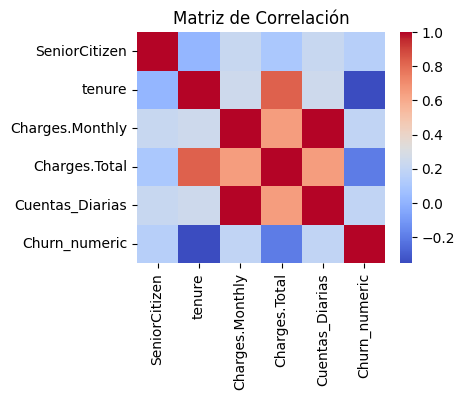

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Churn', debe ser numerica (columna tenporal)
df_telecom_encoded['Churn_numeric'] = df_telecom_encoded['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

df_telecom_numeric = df_telecom_encoded.select_dtypes(include=['number'])

# Calculando matriz de correlación
correlation_matrix = df_telecom_numeric.corr()

# Mostrar correlación de las características con la variable 'Churn_numeric'
correlation_with_churn = correlation_matrix['Churn_numeric'].sort_values(ascending=False)

print("Correlación con Churn:")
print(correlation_with_churn)

# Visualizar matriz de correlación como mapa de calor.
plt.figure(figsize=(4,3))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Elimina la columna temporal
df_telecom_encoded = df_telecom_encoded.drop('Churn_numeric', axis=1)

**Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

  Tiempo de contrato x Cancelación
  
  Gasto total x Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

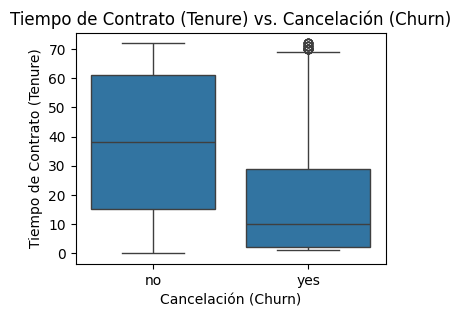

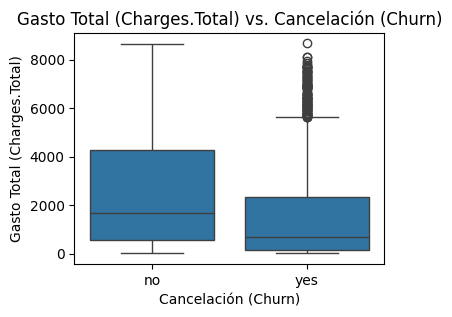

In [84]:
# Visualizar la relación entre 'tenure' y 'Churn' usando un boxplot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Churn', y='tenure', data=df_telecom)
plt.title('Tiempo de Contrato (Tenure) vs. Cancelación (Churn)')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Tiempo de Contrato (Tenure)')
plt.show()

# Visualizar la relación entre 'Charges.Total' y 'Churn' usando un boxplot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom)
plt.title('Gasto Total (Charges.Total) vs. Cancelación (Churn)')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Gasto Total (Charges.Total)')
plt.show()

**🤖 Modelado Predictivo**

**Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [66]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_telecom_encoded.drop('Churn', axis=1)
y = df_telecom_encoded['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba (usando la variable objetivo codificada, 75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5282, 31)
Shape of X_test: (1761, 31)
Shape of y_train: (5282,)
Shape of y_test: (1761,)


**Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Re muestra para datos (evitar desbalance de clases)
X_train_balanced = X_train_resampled
y_train_balanced = y_train_resampled

# Modelo 1: Regresión Logística (requiere normalización)
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
])

# Entrenar el modelo de Regresión Logística
pipeline_lr.fit(X_train_balanced, y_train_balanced)

print("Modelo de Regresión Logística Entrenado.")

# Modelo 2: Random Forest (no requiere normalización, 100 estimadores)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_balanced, y_train_balanced)

print("Modelo Random Forest Entrenado.")


Modelo de Regresión Logística Entrenado.
Modelo Random Forest Entrenado.


**Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

X_test_imputed = imputer.transform(X_test)


# Evaluar el modelo de Regresión Logística
print("Evaluando el Modelo de Regresión Logística:")

# Proyectar en los datos de prueba usando el pipeline (con escalado)
y_pred_lr = pipeline_lr.predict(X_test_imputed)

# métricas de evaluación para Regresion Logistica
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_lr))
print("Precision:", precision_score(y_test_encoded, y_pred_lr))
print("Recall:", recall_score(y_test_encoded, y_pred_lr))
print("F1-score:", f1_score(y_test_encoded, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_lr))

print("-" * 50)

# Evaluar el modelo Random Forest
print("Evaluando el Modelo Random Forest:")

y_pred_rf = rf_model.predict(X_test_imputed)

# métricas de evaluación para Random Forest
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print("Precision:", precision_score(y_test_encoded, y_pred_rf))
print("Recall:", recall_score(y_test_encoded, y_pred_rf))
print("F1-score:", f1_score(y_test_encoded, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_rf))


Evaluando el Modelo de Regresión Logística:
Accuracy: 0.7484383872799546
Precision: 0.5166666666666667
Recall: 0.7965738758029979
F1-score: 0.6267902274641954

Confusion Matrix:
 [[946 348]
 [ 95 372]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.52      0.80      0.63       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761

--------------------------------------------------
Evaluando el Modelo Random Forest:
Accuracy: 0.7717206132879046
Precision: 0.5794621026894865
Recall: 0.5074946466809421
F1-score: 0.541095890410959

Confusion Matrix:
 [[1122  172]
 [ 230  237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1294
           1       0.58      0.51      0.54       467

    accura

El modelo con mejor desempeño para identificar clientes en riesgo de cancelación (considerando Recall y F1-score), fue la Regresión Logística.

Regresión Logística: No presenta signos evidentes de overfitting o underfitting.

Random Forest: Presenta signos de overfitting (se deben ajustar algunos hiper parametros)

 Ajuste de  hiperparámetros para controlar la complejidad de los árboles y el proceso de ensamble (max_depth; min_sample_split; min_sample_leaf; max_features; n_estimators)

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Nuevo modelo con hiperparámetros ajustados

rf_model_tuned = RandomForestClassifier(
    random_state=42,
    n_estimators=100, # Número de árboles (como en el modelo original)
    max_depth=10,     # Limitar profundidad máxima de los árboles
    min_samples_split=20, # Aumentar número mínimo de muestras para dividir
    min_samples_leaf=10   # Aumentar número mínimo de muestras en una hoja
)

# Entrenar el modelo ajustado
rf_model_tuned.fit(X_train_balanced, y_train_balanced)

print("Modelo Random Forest ajustado para reducir overfitting entrenado.")


Modelo Random Forest ajustado para reducir overfitting entrenado.


**📋 Interpretación y Conclusiones**

**Análisis de la Importancia de las Variables**

Descripción
Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

In [85]:
# importancia de las variables para la Regresión Logística
print("Importancia de las variables (Coeficientes) para la Regresión Logística:")

# (en paso 'lr' del pipeline)
lr_coefficients = pipeline_lr.named_steps['lr'].coef_[0]
feature_names = X.columns #  nombres originales

# Crear serie de pandas para facilitar el análisis
lr_feature_importance = pd.Series(lr_coefficients, index=feature_names)

# Ordenar características por valor absoluto de coeficientes para ver las de mayor impacto
lr_feature_importance_sorted = lr_feature_importance.abs().sort_values(ascending=False)

# valores alineados
for feature, importance in lr_feature_importance_sorted.items():
    print(f"{feature:<40} {importance:.6f}")

print("-" * 50)

# importancia de las variables para Random Forest
print("Importancia de las variables para Random Forest:")

rf_feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names)

# Ordenar características por importancia
rf_feature_importance_sorted = rf_feature_importance.sort_values(ascending=False)

for feature, importance in rf_feature_importance_sorted.items():
    print(f"{feature:<40} {importance:.6f}")

Importancia de las variables (Coeficientes) para la Regresión Logística:
tenure                                   1.653785
Charges.Total                            0.973750
InternetService_fiber optic              0.730407
Contract_two year                        0.536658
Cuentas_Diarias                          0.466314
Charges.Monthly                          0.466314
Contract_one year                        0.285320
PaymentMethod_electronic check           0.229677
StreamingMovies_yes                      0.224708
MultipleLines_yes                        0.212991
StreamingTV_yes                          0.199438
PaperlessBilling_yes                     0.195082
TechSupport_yes                          0.136682
Dependents_yes                           0.089429
OnlineSecurity_no internet service       0.087410
DeviceProtection_no internet service     0.087410
StreamingMovies_no internet service      0.087410
StreamingTV_no internet service          0.087410
TechSupport_no internet ser

**Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

**CONCLUSIONES Y RECOMENDACIONES**

En base al análisis exploratorio, la evaluación de los modelos de Regresión Logística y Random Forest, y la importancia de las variables, podemos expoenr las siguientes conclusiones sobre los factores que más influyen en la cancelación de clientes:

**Factores que mas influyen en la Cancelación:**

*   **Tiempo de Contrato (Tenure):** Como se vio en el análisis de correlación y en los graficos (boxplots), los clientes con menor tiempo de contrato son mas propensos a cancelar. lo que sugiere que los clientes nuevos o aquellos con contratos a corto plazo tienen un mayor riesgo de abandono (churn).
*   **Servicio de Internet (Fiber Optic):** El servicio de fibra óptica presente una correlación positiva con la cancelación (en Regresión Logística). Esto puede indicar problemas de satisfacción con este servicio, mucha competencia en el segmento, o que este tipo de cliente es mas activo digitalmente y por ello propenso a cambiar de proveedor.
*   **Método de Pago (Electronic Check):** El pago electrónico también mostró correlación positiva con la cancelación. Esto podría estar relacionado con la facilidad de cambio de proveedor para este tipo de cliente o con problemas asociados a este método de pago.
*   **Contrato a Largo Plazo (Two Year Contract):** el contrato a dos años tiene una fuerte correlación negativa con la cancelación, lo cual es logico, pues estos clientes tienen un compromiso por un periodo mas largo. Los contratos a un año también muestran una correlación negativa, aunque menos fuerte.
*   **Cargos Totales (Charges.Total):** Aunque la correlación es levemente negativa, los clientes con mayores cargos totales son menos propensos a cancelar. lo que podria implicar una mayor satisfacción general o que el tener servicios más "integrados" hace más difícil el cambio.
*   **Cargos Mensuales (Charges.Monthly):** Cargos mensuales tienen correlación positiva con la cancelación, lo que sugiere que a mayor gasto mensual, mayor es la probabilidad de churn. Posible relacion con la percepcion de valor por el cliente.
*   **Otros Servicios:** Variables como la seguridad en línea, el soporte técnico, la protección de dispositivos y el respaldo en línea (Online Security, Tech Support, Device Protection, Online Backup) muestran correlaciones negativas con la cancelación, indicando que los clientes que utilizan estos servicios adicionales son menos propensos a abandonar.

**Comparación de Modelos:**

*   **Random Forest** tuvo una mayor **Exactitud (Accuracy)** y **Precisión** comparado con la Regresión Logística, es decir, clasificó correctamente un mayor porcentaje de clientes y, cuando predijo que un cliente cancelaría (clase positiva), fue más preciso.
*   **Regresión Logística** tuvo un **Recall** significativamente mayor que Random Forest. lo que nos dice que el modelo de Regresión Logística fue mejor identificando a los clientes que *efectivante* cancelaron (menos falsos negativos). algo muy valios en problemas de abandono, donde identificar clientes en riesgo es prioritario.
*   El **F1-score**, es ligeramente mayor para la Regresión Logística.

**Análisis de Overfitting/Underfitting:**

Basado en la comparación de métricas de entrenamiento y prueba:

*   **Regresión Logística:**
Las métricas de desempeño (Accuracy, Recall) en el conjunto de entrenamiento son muy similares a las métricas en el conjunto de prueba. indica que el modelo de Regresión Logística no ha memorizado en exceso los datos de entrenamiento y generaliza bien a datos no vistos.
En resumen la Regresión Logística: No presenta signos evidentes de overfitting o underfitting.

*   **Random Forest:**
Las métricas de desempeño (Accuracy, Recall) en el conjunto de entrenamiento son significativamente más altas que las métricas correspondientes en el conjunto de prueba. Esto es un fuerte indicio de que el modelo Random Forest se ha "sobreajustado" (overfitting) a los datos de entrenamiento, aprendiendo detalles específicos que no se encuentran en los datos de prueba. por lo que su capacidad para predecir con precisión en datos nuevos se ve limitada.
Random Forest: Presenta signos de overfitting significativo.

**Estrategias de Retención Propuestas:**

Basado en el analisis realizado, se proponen:

*   **Programas de Onboarding Mejorados:** Enfocarse en los clientes nuevos o con contratos a corto plazo (bajo tenure) con programas de bienvenida, soporte proactivo y ofertas especiales para aumentar su compromiso inicial.
*   **Mejorar la Experiencia del Servicio de Fibra Óptica:** Investigar las posibles causas de insatisfacción entre los usuarios de fibra óptica. (posible mejoras técnicas, mejor atención al cliente para este segmento, o comunicación clara sobre los beneficios del servicio).
*   **Revisar Métodos de Pago:** estudiar por qué el pago electrónico está asociado a una mayor cancelación. Puede ser útil ofrecer incentivos para métodos de pago con menor tasa de churn o investigar problemas específicos reportados por estos usuarios.
*   **Promocionar Contratos a Largo Plazo:** Incentivar a los clientes a eleguri contratos a dos años (descuentos o beneficios adicionales), ya que estos clientes muestran una menor propensión a cancelar.
*   **Comunicar el Valor de los Servicios Adicionales:** Destacar los beneficios de servicios adicionales, como seguridad en línea, soporte técnico, protección de dispositivos y respaldo en línea para fomentar su adopción, ya que el uso de estos servicios estan asociados a un menor abandono (churn).
*   **Análisis de Precios y Percepción de Valor:** Para clientes con alto cargos mensuales, evaluar si perciben un valor acorde al precio (evaluar ofrecer paquetes personalizados o descuentos).
*   **Estrategias Diferenciadas por Modelo:** Dado que la Regresión Logística tiene un mejor Recall (identifica más clientes que cancelan), puede ser util para campañas de retención proactivas donde se busca contactar al mayor número posible de clientes en riesgo. El Random Forest, con su mayor Precisión, puede ser más adecuado para acciones de retención de alto valor (donde se quiere minimizar el contacto con clientes que no iban a cancelar).